In [1]:
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import yt
plt.style.use('default')

import sys
sys.path.append("/cluster/home/yhgong/")

from python.modules.features.plot.plot1d import *

In [2]:
simFile = SimFileModel(
    simPath="/lfs/data/yhgong/productionRun/mergerAGN/MHD/Cooling_Feedback_ContiRandom15",
    hdf5FilePrefix="perseus_merger_hdf5_plt_cnt",
    fileSterMyr=1
)

### Jet Power

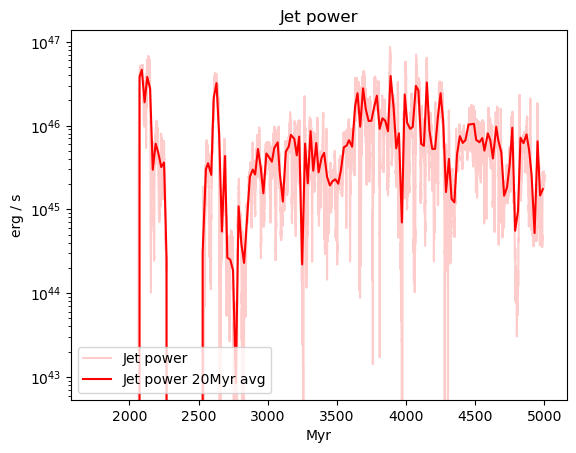

In [6]:
fig, ax = plt.subplots()

fig, ax = Plot1d().jetPowerTimeSeries(
    simFile=simFile,
    calculationInfo=JetPowerTimeSeriesCalculationInfoModel(
        tStartMyr=1740,
        tEndMyr=5000
    ),
    plotInfo=Plot1dInfoModel(
        title="Jet power",
        yLogScale=True,
        lineLabel="Jet power",
        lineColor="red",
        lineAlpha=0.2,
        fig=fig,
        ax=ax
    )
)

fig, ax = Plot1d().jetPowerTimeSeries(
    simFile=simFile,
    calculationInfo=JetPowerTimeSeriesCalculationInfoModel(
        tStartMyr=1740,
        tEndMyr=5000,
        smoothingMyr=20,
    ),
    plotInfo=Plot1dInfoModel(
        title="Jet power",
        yLogScale=True,
        lineLabel="Jet power 20Myr avg",
        lineColor="red",
        fig=fig,
        ax=ax
    )
)

### Turbulence heating

#### Profile

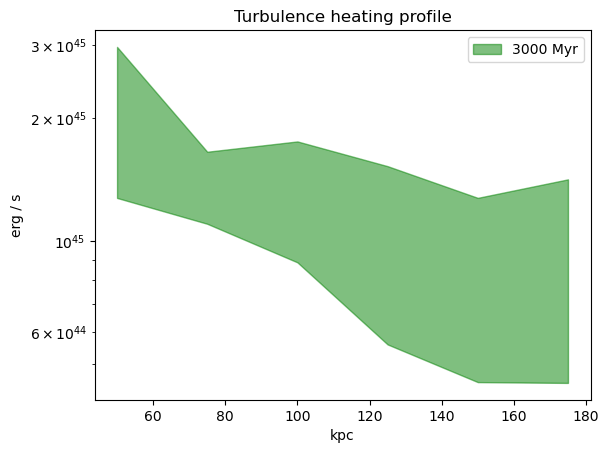

In [7]:
fig, ax = Plot1d().turbulenceHeatingProfile(
    simFile=simFile,
    calculationInfo=TurbulenceHeatingProfileCalculationInfoModel(
        rhoIndex=0,
        shape=Shape.Box,
        rStartKpc=50,
        rEndKpc=200,
        rStepKpc=25,
        tMyr=3000
    ),
    plotInfo=Plot1dInfoModel(
        title="Turbulence heating profile",
        yLogScale=True,
        lineColor="green",
        lineAlpha=0.5
    )
)

### Time series

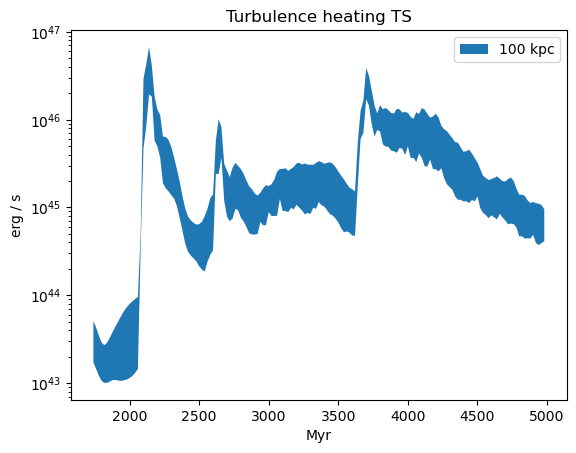

In [8]:
fig, ax = Plot1d().turbulenceHeatingTimeSeries(
    simFile=simFile,
    calculationInfo=TurbulenceHeatingTimeSeriesCalculationInfoModel(
        tStartMyr=1740,
        tEndMyr=5000,
        tStepMyr=20,
        rKpc=100,
        rhoIndex=0,
        shape=Shape.Box
    ),
    plotInfo=Plot1dInfoModel(
        title="Turbulence heating TS",
        yLogScale=True
    )
)

### Turbulence heating vazza

#### Time series

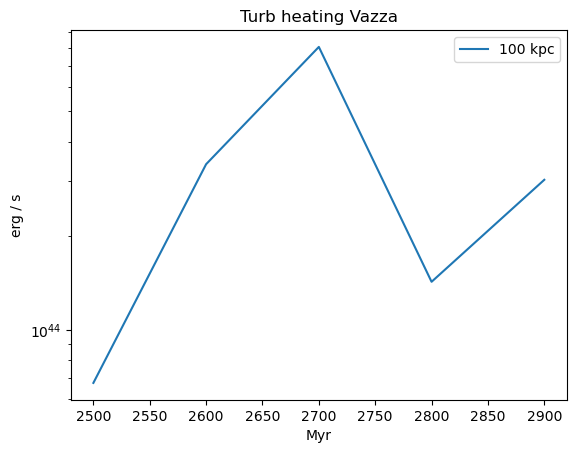

In [3]:
fig, ax = Plot1d().turbulenceHeatingVazzaTimeSeries(
    powerMode="total",
    turbMode=TurbulenceHeatingVazzaMode.TurbVel,
    simFile=simFile,
    calculationInfo=TurbulenceHeatingVazzaTimeSeriesCalculationInfoModel(
        tStartMyr=2500,
        tEndMyr=3000,
        tStepMyr=100,
        shape=Shape.Box,
        rKpc=100,
        bulkTurbFilteringMaxScale=40
    ),
    plotInfo=Plot1dInfoModel(
        title="Turb heating Vazza",
        yLogScale=True
    )
)

#### Profile

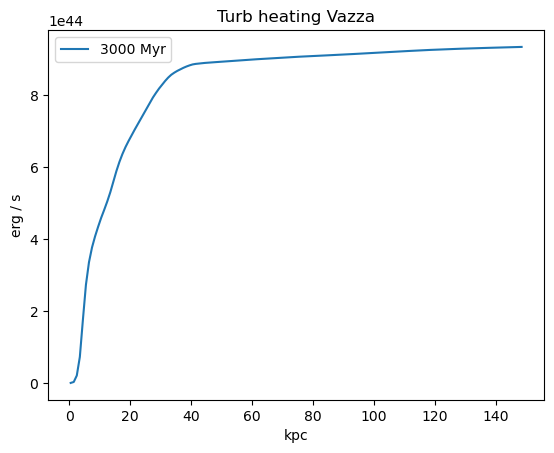

In [4]:
fig, ax = Plot1d().turbulenceHeatingVazzaProfile(
    powerMode="total",
    turbMode=TurbulenceHeatingVazzaMode.TurbSoleVel,
    simFile=simFile,
    calculationInfo=TurbulenceHeatingVazzaProfileCalculationInfoModel(
        rStartKpc=0,
        rEndKpc=150,
        rStepKpc=1,
        tMyr=3000,
        shape=Shape.Sphere
    ),
    plotInfo=Plot1dInfoModel(
        title="Turb heating Vazza"
    )
)

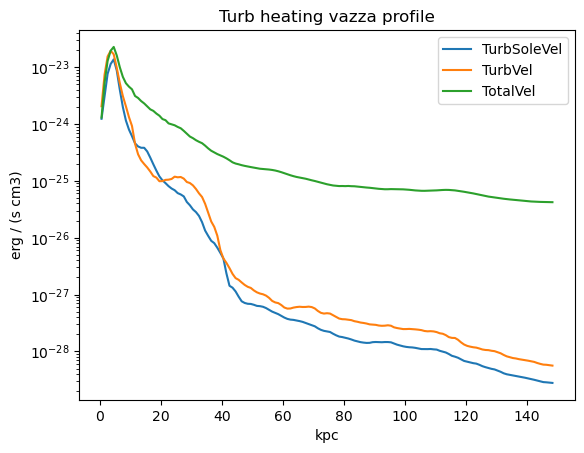

In [7]:
fig, ax = plt.subplots()

turbHeatingModes  = [
    TurbulenceHeatingVazzaMode.TurbSoleVel,
    TurbulenceHeatingVazzaMode.TurbVel,
    TurbulenceHeatingVazzaMode.TotalVel
]

for turbHeatingMode in turbHeatingModes:
    fig, ax = Plot1d().turbulenceHeatingVazzaProfile(
        powerMode="perVolume",
        turbMode=turbHeatingMode,
        simFile=simFile,
        calculationInfo=TurbulenceHeatingVazzaProfileCalculationInfoModel(
            rStartKpc=0,
            rEndKpc=150,
            rStepKpc=1,
            tMyr=3000,
            shape=Shape.Sphere
        ),
        plotInfo=Plot1dInfoModel(
            title="Turb heating vazza profile",
            yLogScale=True,
            fig=fig,
            ax=ax,
            lineLabel=f"{turbHeatingMode}".split(".")[-1],
        )
    )

Bug in old analysis

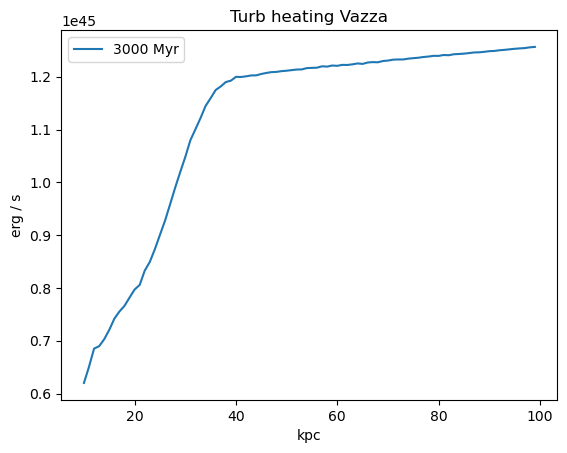

In [4]:
fig, ax = Plot1d().turbulenceHeatingVazzaProfile(
    powerMode="total",
    turbMode=TurbulenceHeatingVazzaMode.TurbVel,
    simFile=simFile,
    calculationInfo=TurbulenceHeatingVazzaProfileCalculationInfoModel(
        rStartKpc=10,
        rEndKpc=100,
        rStepKpc=1,
        tMyr=3000,
        shape=Shape.Sphere
    ),
    plotInfo=Plot1dInfoModel(
        title="Turb heating Vazza"
    )
)

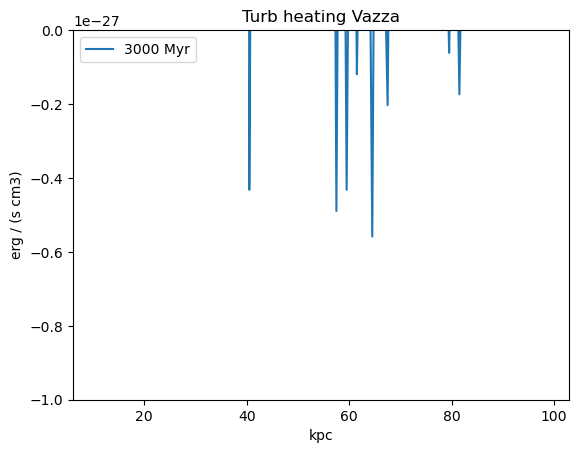

In [12]:
fig, ax = Plot1d().turbulenceHeatingVazzaProfile(
    powerMode="perVolume",
    turbMode=TurbulenceHeatingVazzaMode.TurbVel,
    simFile=simFile,
    calculationInfo=TurbulenceHeatingVazzaProfileCalculationInfoModel(
        rStartKpc=10,
        rEndKpc=100,
        rStepKpc=1,
        tMyr=3000,
        shape=Shape.Sphere
    ),
    plotInfo=Plot1dInfoModel(
        title="Turb heating Vazza",
        yUpperBound=0,
        yLowerBound=-1e-27
    )
)

### Yt

#### Profile

yt : [INFO     ] 2024-05-27 12:34:14,430 Particle file found: perseus_merger_hdf5_part_3000


yt : [INFO     ] 2024-05-27 12:34:14,486 Parameters: current_time              = 9.467103730227557e+16
yt : [INFO     ] 2024-05-27 12:34:14,487 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-27 12:34:14,488 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-27 12:34:14,489 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-27 12:34:14,490 Parameters: cosmological_simulation   = 0


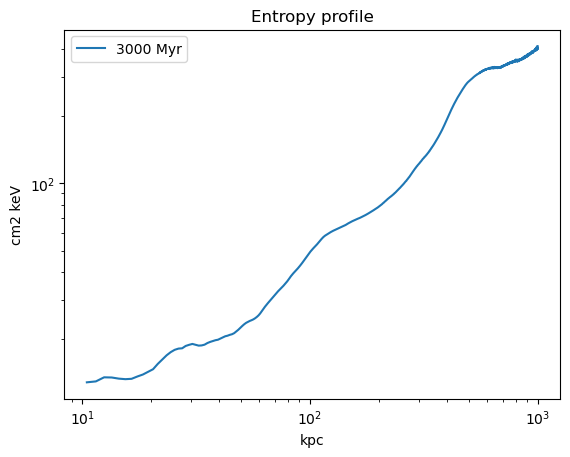

In [4]:
fig, ax = Plot1d().ytProfile(
    simFile=simFile,
    calculationInfo=YtProfileCalculationInfoModel(
        rStartKpc=10,
        rEndKpc=1000,
        rStepKpc=1,
        tMyr=3000,
        shape=Shape.Sphere,
        fieldName=("gas","entropy")
    ),
    plotInfo=Plot1dInfoModel(
        title="Entropy profile",
        yLogScale=True,
        xLogScale=True
    )
)

#### Time series

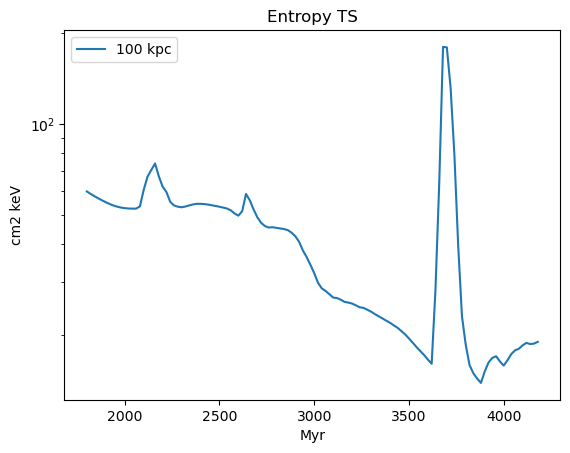

In [12]:
fig, ax = Plot1d().ytTimeSeries(
    simFile=simFile,
    calculationInfo=YtTimeSeriesCalculationInfoModel(
        tStartMyr=1800,
        tEndMyr=4200,
        tStepMyr=20,
        rKpc=100,
        shape=Shape.Sphere,
        fieldName=("gas","entropy")
    ),
    plotInfo=Plot1dInfoModel(
        title="Entropy TS",
        yLogScale=True
    )
)

### Xray

#### Profile

yt : [INFO     ] 2024-05-28 13:04:29,689 Particle file found: perseus_merger_hdf5_part_3000
yt : [INFO     ] 2024-05-28 13:04:29,770 Parameters: current_time              = 9.467103730227557e+16
yt : [INFO     ] 2024-05-28 13:04:29,772 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-28 13:04:29,773 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-28 13:04:29,774 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-28 13:04:29,775 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-28 13:04:33,827 Loading emissivity data from ./apec_emissivity_v3.h5
yt : [INFO     ] 2024-05-28 13:04:33,831 X-ray emissivity data calculated with APEC 3.0.9 on 11/19/2019 by John ZuHone.
yt : [INFO     ] 2024-05-28 13:04:33,832 X-ray 'apec' emissivity data version: 3.
yt : [INFO     ] 2024-05-28 13:04:33,861 Adding ('gas','xray_emissivity_0.5_7_keV') field.

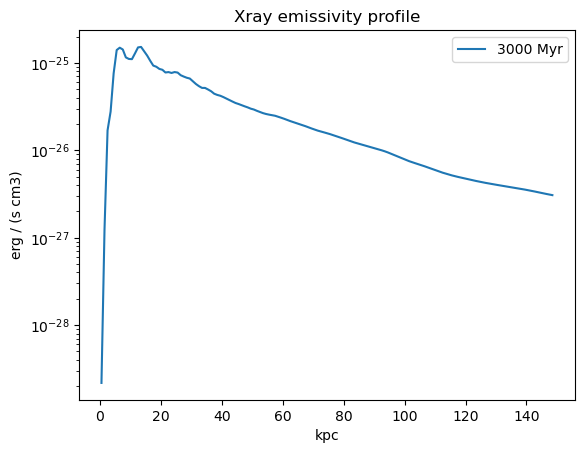

In [3]:
fig, ax = Plot1d().xrayProfile(
    mode="emissivity",
    simFile=simFile,
    calculationInfo=XrayProfileCalculationInfoModel(
        shape=Shape.Sphere,
        rStartKpc=0,
        rEndKpc=150,
        rStepKpc=1,
        tMyr=3000
    ),
    plotInfo=Plot1dInfoModel(
        title="Xray emissivity profile",
        yLogScale=True,
        yLowerBound=8e-27
    )
)

yt : [INFO     ] 2024-05-28 13:04:48,852 Particle file found: perseus_merger_hdf5_part_3000
yt : [INFO     ] 2024-05-28 13:04:48,903 Parameters: current_time              = 9.467103730227557e+16
yt : [INFO     ] 2024-05-28 13:04:48,904 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-28 13:04:48,905 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-28 13:04:48,906 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-28 13:04:48,907 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2024-05-28 13:04:52,841 Loading emissivity data from ./apec_emissivity_v3.h5
yt : [INFO     ] 2024-05-28 13:04:52,844 X-ray emissivity data calculated with APEC 3.0.9 on 11/19/2019 by John ZuHone.
yt : [INFO     ] 2024-05-28 13:04:52,845 X-ray 'apec' emissivity data version: 3.
yt : [INFO     ] 2024-05-28 13:04:52,863 Adding ('gas','xray_emissivity_0.5_7_keV') field.
yt : [INFO     ] 2024-05-28 13:04:52,863 Adding ('gas','xray_luminosity_0.5_7_keV') field.
yt : [INFO     ] 2024-05-28 13:04:52,864 Adding ('gas','xray_photon_emissivity_0.5_7_keV') field.


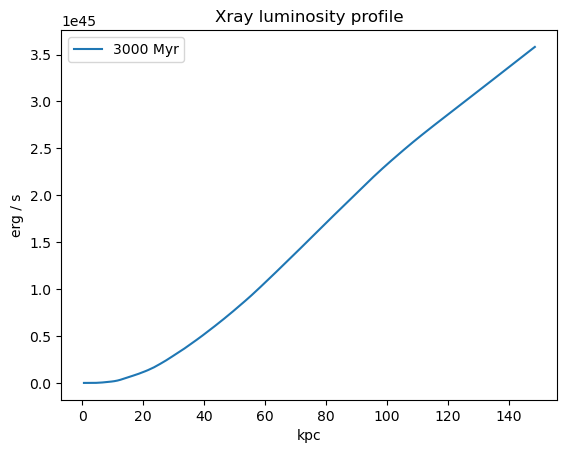

In [4]:
fig, ax = Plot1d().xrayProfile(
    mode="luminosity",
    simFile=simFile,
    calculationInfo=XrayProfileCalculationInfoModel(
        shape=Shape.Sphere,
        rStartKpc=0,
        rEndKpc=150,
        rStepKpc=1,
        tMyr=3000
    ),
    plotInfo=Plot1dInfoModel(
        title="Xray luminosity profile"
    )
)

#### Time Series

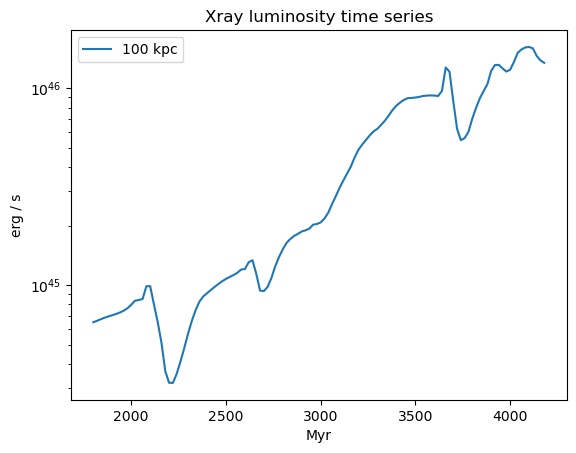

In [4]:
fig, ax = Plot1d().xrayTimeSeries(
    mode="luminosity",
    simFile=simFile,
    calculationInfo=XrayTimeSeriesCalculationInfoModel(
        tStartMyr=1800,
        tEndMyr=4200,
        tStepMyr=20,
        rKpc=100,
        shape=Shape.Sphere
    ),
    plotInfo=Plot1dInfoModel(
        title="Xray luminosity time series",
        yLogScale=True
    )
)

### Some other tests (Unrelated to the above)

In [17]:
import matplotlib.pyplot as plt

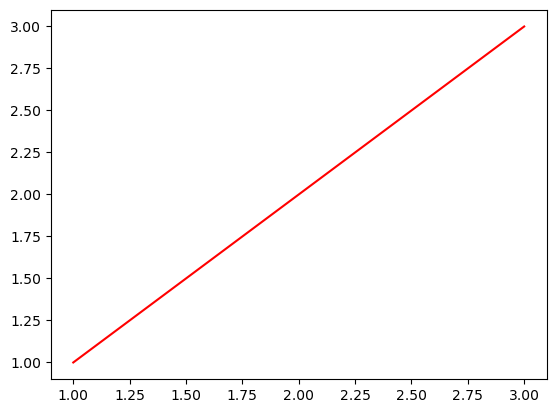

In [21]:
fig: plt.Figure
ax: plt.Axes

fig, ax = plt.subplots()
line = ax.plot([1,2,3], [1,2,3])
line[0].set_color("red")
line[0].set_linestyle("-")
